### COURSERA CAPSTONE PROJECT

######  This notebook contains the coursera capstone project where our main aim is to locate and suggest friendly locality for  people for are moving from one place to another.

In [2]:
import pandas as pd
import numpy as np
import requests

In [5]:
!pip3 install pandas

In [3]:
!pip3 install lxml

#### The requests I will create a dataframe from the wiki and I will further clean the dataframe and ensure
#### only those columns are present where neighborhood is not null.

In [4]:
wiki_link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
wiki_page = requests.get(wiki_link)

dataframe = pd.read_html(wiki_page.content, header = 0)[0]
df = dataframe[dataframe.Neighborhood != 'Not assigned']
df.reset_index(inplace = True)
df.head()

,index,Postal Code,Borough,Neighborhood
0,2,M3A,North York,Parkwoods
1,3,M4A,North York,Victoria Village
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


#### Group the postal code col using groupby function

In [5]:
df.groupby(['Postal Code']).first()

,index,Borough,Neighborhood
Postal Code,,,
M1B,9,Scarborough,"Malvern, Rouge"
M1C,18,Scarborough,"Rouge Hill, Port Union, Highland Creek"
M1E,27,Scarborough,"Guildwood, Morningside, West Hill"
M1G,36,Scarborough,Woburn
M1H,45,Scarborough,Cedarbrae
...,...,...,...
M9N,98,York,Weston
M9P,107,Etobicoke,Westmount
M9R,116,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."


#### Display the shape of the dataframe.

In [6]:
df.shape

(103, 4)

# Part 2
#### Use url to create a dataframe

In [7]:
url = 'http://cocl.us/Geospatial_data'

In [8]:
df_geo = pd.read_csv(url)
df_geo.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Check the data type and shape of the df_geo dataframe

In [9]:
print("The data type of the df_geo is: ",df_geo.dtypes)
print("The shape of the dataframe is: ",df_geo.shape)

The data type of the df_geo is:  Postal Code     object
Latitude       float64
Longitude      float64
dtype: object
The shape of the dataframe is:  (103, 3)


#### Join the two dataframes i.e df and df_geo

In [10]:
df = df.join(df_geo.set_index('Postal Code'), on='Postal Code',how='left')
df

,index,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,2,M3A,North York,Parkwoods,43.753259,-79.329656
1,3,M4A,North York,Victoria Village,43.725882,-79.315572
2,4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,5,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...,...
98,160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,165,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,168,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [11]:
df=df.drop(['index'],axis=1)
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


#### Install geocoder

In [13]:
! pip install geocoder

Using legacy setup.py install for future, since package 'wheel' is not installed.
    Running setup.py install for future: started
    Running setup.py install for future: finished with status 'done'


#### Install geopy

In [17]:
!pip3 install geopy

In [22]:
import folium
import geocoder
from geopy.geocoders import Nominatim 

In [21]:
!pip install folium

#### Get the coordinates values of Toronto 

In [23]:
add = 'Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(add)
latitude = location.latitude
longitude= location.longitude
print('The coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The coordinate of Toronto are 43.6534817, -79.3839347.


#### Map the neightbourhood of Toronto 

In [24]:
#Define the coordinates of toronto
Map= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='red',
        fill_opacity=0.5).add_to(Map)  
    
Map

#### Filter the borough that contains only toronto

In [25]:
#Empty list

List_toronto = []
#Parse the borough column

for x in df['Borough'].unique():
    if "Toronto" in x:
        List_toronto.append(x)
        
List_toronto

['Downtown Toronto', 'East Toronto', 'West Toronto', 'Central Toronto']

#### Create a new dataframe with only toronto name

In [26]:
df_toronto = df[df['Borough'].isin(List_toronto)].reset_index(drop=True)

df_toronto.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


#### Using Foursquare API to explore neighbourhood

In [27]:
# define Foursquare Credentials and Version
CLIENT_ID = 'DW220BXCDDO5FKMQZOQGOZFESKLZCXS4UMC0YEZVMZHDY0TV' # your Foursquare ID
CLIENT_SECRET = 'R3KKZUGFGGVINYKNATLIGVZ5RIUG1UIXJZYB3LKX4TZI5RPJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DW220BXCDDO5FKMQZOQGOZFESKLZCXS4UMC0YEZVMZHDY0TV
CLIENT_SECRET:R3KKZUGFGGVINYKNATLIGVZ5RIUG1UIXJZYB3LKX4TZI5RPJ


#### Let explore and get top 150 locations with a radius of 700 meters

In [28]:
radius = 700
LIMIT = 150

venues = []

for lat, long, post, borough, neighborhood in zip(df_toronto['Latitude'], df_toronto['Longitude'],df_toronto['Postal Code'], df_toronto['Borough'],df_toronto['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            post, 
            borough,
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
    results

In [29]:
# convert the venues list into a new DataFrame
df_venues = pd.DataFrame(venues)


df_venues.columns = ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(df_venues.shape)
df_venues

(2491, 9)


,PostalCode,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
...,...,...,...,...,...,...,...,...,...
2486,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TTC Leslie Barns,43.657633,-79.325212,Light Rail Station
2487,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,TH&SC Toronto Hydroplane & Sailing Club,43.660255,-79.314089,Harbor / Marina
2488,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,Balmy Beach Canoe Club,43.661104,-79.313564,Harbor / Marina
2489,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,It's the Icing on the Cake,43.663453,-79.329813,Bakery


#### PLOT A BAR GRAPH TO CALCULATE THE NUMBER OF RESTAURANT,BAKERY,DESSERT SHOPS,COFFEE SHOPS,CHOCOLATE SHOPS ARE PRESENT IN THE NEIGHBOURHOOD

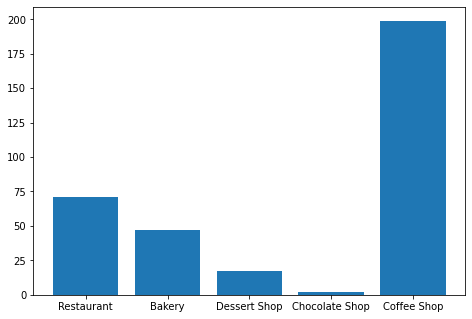

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
shops = ['Restaurant', 'Bakery', 'Dessert Shop', 'Chocolate Shop', 'Coffee Shop']
number = [(df_venues.VenueCategory=='Restaurant').sum(),
          (df_venues.VenueCategory=='Bakery').sum(),
          (df_venues.VenueCategory=='Dessert Shop').sum(),
          (df_venues.VenueCategory=='Chocolate Shop').sum(),
          (df_venues.VenueCategory=='Coffee Shop').sum()]
ax.bar(shops,number)
plt.show()

In [48]:
!pip install matplotlib

#### Create a list that contains all the shops present in the neighbourhood

In [68]:
l=[]
for ind in df_venues['VenueCategory'].index:
    if('Shop' in df_venues['VenueCategory'][ind]):
        #print(df_venues['VenueCategory'][ind])
        l.append(df_venues['VenueCategory'][ind])
print(l)
    

['Coffee Shop', 'Coffee Shop', 'Dessert Shop', 'Coffee Shop', 'Chocolate Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Ice Cream Shop', 'Coffee Shop', 'Cosmetics Shop', 'Coffee Shop', 'Coffee Shop', 'Wine Shop', 'Coffee Shop', 'Antique Shop', 'Coffee Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Hobby Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Smoothie Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Comic Shop', 'Shopping Mall', 'Coffee Shop', 'Miscellaneous Shop', 'Cosmetics Shop', 'Cosmetics Shop', 'Bubble Tea Shop', 'Coffee Shop', 'Coffee Shop', 'Dessert Shop', 'Coffee Shop', 'Coffee Shop', 'Bubble Tea Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Coffee Shop', 'Cosmetics Shop', 'Coffee Shop', 'Ice Cream Shop', 'Coffee Shop', 'Tailor Shop', 'Cosmetics Shop', 'Cosmetics Shop', 'Coffee Shop', 'Coffee Shop', 'Shopping Mall', 'Coffee Shop', 'Ic

#### Make a unqiue list that contains no duplicate shops

In [70]:
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    for x in unique_list: 
        print(x)  
      

In [71]:
unique(l)

Coffee Shop
Dessert Shop
Chocolate Shop
Ice Cream Shop
Cosmetics Shop
Wine Shop
Antique Shop
Bubble Tea Shop
Hobby Shop
Smoothie Shop
Comic Shop
Shopping Mall
Miscellaneous Shop
Tailor Shop
Bagel Shop
Cheese Shop
Sporting Goods Shop
Gourmet Shop
Optical Shop
Donut Shop
Gift Shop
Smoke Shop
Souvlaki Shop
Record Shop
Cupcake Shop
Frozen Yogurt Shop
Fish & Chips Shop
Supplement Shop
Board Shop
Food & Drink Shop
Mobile Phone Shop
Flower Shop


#### Find which food and drink shop is the most loved in the neigbourhood

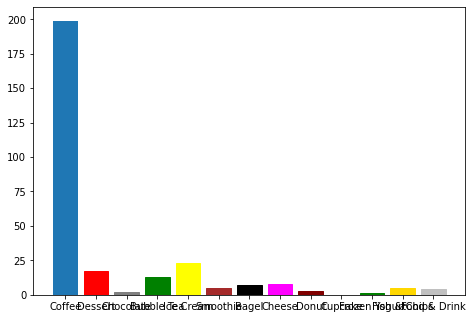

In [96]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
shops = ['Coffee','Dessert', 'Chocolate', 'Bubble Tea','Ice Cream','Smoothie','Bagel','Cheese','Donut','Cupcake','Frozen Yogurt',
        'Fish & Chips','Food & Drink']
number = [(df_venues.VenueCategory=='Coffee Shop').sum(), 
          (df_venues.VenueCategory=='Dessert Shop').sum(),
          (df_venues.VenueCategory=='Chocolate Shop').sum(),
          (df_venues.VenueCategory=='Bubble Tea Shop').sum(),
          (df_venues.VenueCategory=='Ice Cream Shop').sum(),
          (df_venues.VenueCategory=='Smoothie Shop').sum(),
          (df_venues.VenueCategory=='Bagel Shop').sum(),
         (df_venues.VenueCategory=='Cheese Shop').sum(),
         (df_venues.VenueCategory=='Donut Shop').sum(),
         (df_venues.VenueCategory=='Cupcke Shop').sum(),
         (df_venues.VenueCategory=='Frozen Yogurt Shop').sum(),
         (df_venues.VenueCategory=='Fish & Chips Shop').sum(),
         (df_venues.VenueCategory=='Food & Drink Shop').sum()]

p=plt.bar(shops,number)
p[1].set_color('red')
p[2].set_color('grey')
p[3].set_color('green')
p[4].set_color('yellow')
p[5].set_color('brown')
p[6].set_color('black')
p[7].set_color('magenta')
p[8].set_color('maroon')
p[9].set_color('blue')
p[10].set_color('green')
p[11].set_color('gold')
p[12].set_color('silver')

plt.show()

From the above graph it is clear that coffee is the loved shop in the neighbourhood of Toronto